## Verifica delle ipotesi

Esplorando i dati del dataset NSFG abbiamo notato alcuni effetti "apparenti", primo tra tutti la differenza tra il periodo di gestazione tra il primo bebè. Fino ad ora abbiamo preso questi risultati così come venivano ora testeremo questi risultati.

La questione fondamentale che vogliamo indirizzare è se gli effetti che vediamo in un campione sono probabili anche in una popolazione più grande.

Per esempio nel campione NSFG abbiamo visto una differenza nella lunghezza media della gestazione, vorremmo sapere se questo effetto sia applicabile anche alla popolazione delle donne americane oppure è apparsa nel campione per puro caso.

Ci sono molti modi per formulare una risposta a questa domanda, quello che vedremo è un sottoinsieme delle possibilità che di solito viene usato nella pratica. Potremo chiamarlo **test delle ipotesi classico**

L'obiettivo di questo test è dare risposta alla domanda "dato un campione e un effetto apparente, quale è la probabilità di vedere questo effetto per caso?" Qui sotto le risposte che possiamo dare:

* Il primo passo è quello di quantificare la dimensione dell'effetto apparente scegliendo un **test statistico**. Nell'esempio precendente dei nascituri l'effetto apparente è la lunghezza della gestazione tra il primo bebè e gli altri, dunque una scelta ovvia potremme essere quella di confrontare le medie tra i due gruppi.

* Il secondo passo è quello di definire una **ipotesi nulla** che è un modello del sistema basato sulla assunzione che l'effetto apparente non sia reale. Sempre prendendo l'esempio di prima l'ipotesi nulla è che non ci siano differenze tra il primo bambino e il secondo e dunque i due gruppi hanno la stessa distribuzione.

* Il terzo passo è quello di calcolare un **p-value** che rappresenta la probabilità di vedere l'effetto apparente se l'ipotesi nulla fosse vera. Sempre usando il nostro classico esempio, possiamo calcolare la differenza puntuale delle medie per poi calcolare la probabilità di vedere una differenza grande o grandissima sotto l'ipotesi nulla.

* L'ultimo passo è quello di interpretare il risultato. Se il p-value è basso si dice che l'effetto è **statisticamente significante**, questo significa che è improbabile che tale effetto occorra per caso. In questo caso possiamo dedurre che l'effetto è più probabile appaia nelle grandi popolazioni.

La logica di questo processo è simile alla prova per contraddizione. Per provare una affermazione A, si assume temporaneamente che A sia falsa. Se questa assunzione conduce ad una contraddizione A per forza deve essere vera. 

Similarmente per testare una ipotesi come "Questo effetto è reale" assumiamo, temporaneamente, che non lo sia. Basandosi su questa assunzione calcoliamo la probabilità dell'effetto apparente, il p-value. Se il p-value è basso possiamo concludere che l'ipotesi nulla è sfortunatemente vera.

## Test delle ipotesi

Cominciamo con il mostrare una classe che ci servirà nel seguito

In [1]:
%matplotlib inline
from utils import calcCdf
import matplotlib.pyplot as plt

class HypothesisTest(object):
    """Rappresenta un test di ipotesi"""

    def __init__(self, data):
        """
        Inizializzazione

        data: dati in ingresso nella forma più interessante
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None
        self.test_cdf = None
        self.values = None

    def PValue(self, iters=1000):
        """
        Calcola la distribuzione del test statistico e il p-value
        
        iters: numero di iterazioni

        returns: float p-value
        """
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]
        
        self.values,_,self.test_cdf = calcCdf(self.test_stats)

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters
    
    def PlotCdf(self, label=None):
        """
        Visualizzo il grafico cdf sui dati di test con una linea verticale 
        al punto di osservazione dei dati di osservazione
        """
        
        plt.plot(self.values,self.test_cdf)
        plt.vlines(self.actual, 0, 1, linestyles ="dotted", colors ="k")
        plt.grid(True)
        
        plt.ylim(0,1)

    def MaxTestStat(self):
        """
        Restituisce il valore più grande durante la simulazione
        """
        return max(self.test_stats)


    def TestStatistic(self, data):
        """
        Calcola il test statistico  
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """
        Costruisce il modello dell'ipotesi nulla
        """
        pass

    def RunModel(self):
        """
        Ritorna il modello dell'ipotesi nulla

        returns: dati simulati
        """
        raise UnimplementedMethodException()

`HypotesisTest` è una classe astratta che verrà estesa nei prossimi esperimenti.
`PValue` calcola la probabilità dell'effetto apparente sotto l'ipotesi nulla come parametro viene passato `iters` che rappresenta il numero di simulazioni da eseguire. La prima linea genera le simuazioni, esegue il test statistico e salva i dati. Il restante codice calcola la frazione di elementi che superano il valore soglia del test.

Partiamo con semplice test, supponiamo di lanciare una monetina 250 volte e di annotare 140 teste e 110 croci.
In base a questo risultato potremmo sospettare di essere di fronte ad una moneta truccata. Per provare questa ipotesi possiamo calcolare la probabilità di vedere una differenza tra testa e croce uguale o più alta.



In [2]:
import random
from collections import Counter

class CoinTest(HypothesisTest):
    """Test di ipotesi per controllare se la monetina è truccata"""

    def TestStatistic(self, data):
        """
        Calcolo il test statistico 
        """
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat

    def RunModel(self):
        """
        eseguo il modello sulla ipotesi nulla

        returns: dati della simulazione
        """
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = Counter(sample)
        data = hist['H'], hist['T']
        return data

il parametro data è una coppia di numeri rappresentanti testa e croce, il test statistico rappresenta la differenza assoluta tra questi dunque nel nostro caso `self.actual` avrà come valore 30.

`RunModel` simula il lancio della monetina assumendo che la stessa non sia truccata. Genera un campione di 250 casi di test e ritorna il numero di teste e di croci del campione. 

In [3]:
ct = CoinTest((140, 110))
pvalue = ct.PValue()
print('coin test p-value', pvalue)

coin test p-value 0.07


il risultato è circa 0.07 il significa che la moneta non è truccata, ci aspettiamo di avere una differenza più grande di 30 tra testa e croce solo il 7% delle volte.

Ma come si interpreta questo risultato? Per convenzione il 5% rappresenta il valore di soglia per avere un significato statistico. Se il risultato è sotto il 5% l'effetto è considerato significante altrimenti se supera il 5% l'ipotesi nulla non è vera.

La scelta del 5% però è arbitraria e come vedremo più avanti il p-value dipende molto dal test statistico e il modello su cui si basa il test nullo.

Dunque il p-value non essere considerato una misura precisa.

Si raccomanda di interpretare il valore di p-value in base alla sua grandezza, se il valore p-value è sotto all'1% l'effetto è improbabile, se sopra il 10% l'effetto è abbastanza probabile, tra l'1% e il 10% siamo in un caso borderline.

Ritornando al nostro caso possiamo dire che non ci sono forti evidenze che la moneta sia truccata.

##  Testare la differenza nelle medie

Uno dei più comuni effetti da testare è la differenza delle medie tra due gruppi. Nel dataset dei nascituri sappiamo che la media del periodo di gestazione è leggermente più lunga e la media del peso leggermente più bassa.

Ora vediamo se questi effetti hanno rilevanza statistica.

Per questi esempi, l'ipotesi nulla è: le distribuzioni dei due gruppi sono le stesse. Un modo di testare l'ipotesi nulla è tramite le **permutazioni**. Così possiamo prendere valori dall'insieme del primo nascituro, valori per gli altri figli e mescolarli assieme, successivamente trattiamo i due gruppi come uno solo.



In [4]:
class DiffMeansPermute(HypothesisTest):
    """
    Testo la differenza delle medie tramite permutazione
    """

    def TestStatistic(self, data):
        """
        Calcolo il test statistico
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """
        Costruisco il modello della ipotesi nulla
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """
        Eseguo il modello sulla ipotesi nulla
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [5]:
from utils import readReadFemPreg
import numpy as np

preg = readReadFemPreg()
live = preg[preg.outcome == 1]

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

data = firsts.prglngth.values, others.prglngth.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()

print('birthlenght test p-value', pvalue)

birthlenght test p-value 0.157


Come si vede il valore p-value è circa di 0.14 il che significa che prendendo dei valori a caso ci si aspetta di trovare delle differenze sulle medie più grandi per circa il 14% dei casi.

Dunque l'effetto desiderato non è statisticamente significante.

Abbiamo anche una funzione `PlotCdf` che visualizza la distribuzione del test statistico, con la linea tratteggiata verticale indicante l'effetto misurato.

La linea tratteggiata colpisce le differenze osservate verso l valore 0.8 che ovviamente è il complemento di p-value.

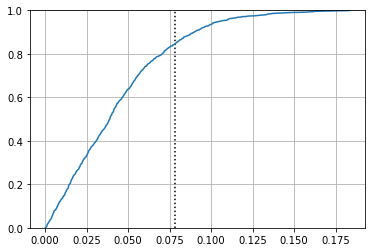

In [6]:
ht.PlotCdf()

Esguiamo lo stesso test con la differenza dei pesi e vediamo il risultato

In [7]:
dataw = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
htw = DiffMeansPermute(dataw)
p_value = htw.PValue(iters=1000)

print('totalwgt test p-value', p_value)

totalwgt test p-value 0.0


## Altri test statistici

Scegliere il miglior test statistico dipende molto dalla domanda a cui si vuol dare risposta. 
Per esempio se la domanda al quesito precedente è se la lunghezza della gestazione è differente tra il primo e gli altri figli, allora la differenza assoluta ha senso.

Ma se volessimo testare che il primo figlio tende a nascere in ritardo allora non possiamo prendere la differenza assoluta, dovremo utilizzare questo test statistico.

In [8]:
class DiffMeansOneSided(DiffMeansPermute):
    """Test per one side per verificare se i bambini tendono a nascere dopo"""

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [9]:
data = firsts.prglngth.values, others.prglngth.values
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()

print('birthlenght test p-value', pvalue)

birthlenght test p-value 0.094


Questo test estende la classe `DiffMeansPermute` e modifica il comportamento del metodo `TestStatistic`.
Questo tipo di test è anche chiamato **one sided** perchè tiene conto solo di un lato della distribuzione delle differenze, mentre il test precedente è anche chiamato **two sided**.

Per questa versione del test il p-value restituisce come risultato un valore attorno al 0.08 in generale il valore p-value verso un solo lato è circa la metà di quello ambo i lati.

Comunque questo valore non da ancora una rilevanza statistica.
Potremmo anche cambiare sistema per testare la differenza statistica ad esempio usando la deviazione standard, abbiamo visto negli esempi precedenti che forse quel valore mostrava evidenze.

Proviamo ad eseguire anche questo test.

In [10]:
class DiffStdPermute(DiffMeansPermute):
    
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [11]:
data = firsts.prglngth.values, others.prglngth.values
ht = DiffStdPermute(data)
pvalue = ht.PValue()

print('birthlenght test std p-value', pvalue)

birthlenght test std p-value 0.082


anche questo test restituisce un risultato statisticamente non rilevante

## Testare una correlazione

Quello che abbiamo visto fino ad ora funziona anche per testare la correlazione tra due variabili, per esempio abbiamo visto che la correlazione tra il peso del bebè, dunque le mamme più anziane tendono ad avere bambini più pesanti ?

Per il test statistico, useremo l'indice di correlazione di Pearson, comunque anche l'indice di Spearman funziona bene.
Se ci si aspetta un valore di correlazione positivo faremo un test one-side. 

Siccome non ne siamo sicuri eseguiremo un test two-side usando il valore assoluto. L'ipotesi nulla è che non ci sia correlazione tra l'eta della madre e il peso del nascituro.

Mescolando i valori osservati possiamo simulare un mondo dove la distribuzione dei pesi è della età è la stessa ma in cui non c'è una correlazione.

In [12]:
import pandas as pd

class CorrelationPermute(HypothesisTest):
    """Tests correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        xs, ys = data
        s1 = pd.Series(xs)
        s2 = pd.Series(ys)
        test_stat = abs(s1.corr(s2, method='pearson'))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [13]:
live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
data = live2.agepreg.values, live2.totalwgt_lb.values
ht = CorrelationPermute(data)
p_value = ht.PValue()
print('age weight correlation', p_value)

age weight correlation 0.0


Il valore di sopra indica che la relazione ha un valore statistico anche se la correlazione ha come valore 0.07, dunque possiamo dire che sebbene la correlazione osservata sia piccola è statisticamente significante.

Questo esempio indica è un promemoria di cosa significa "statisticamente significante" non sempre significa che l'effetto sia importante o significativo in pratica. 
Significa solo che è improbabile che succeda per caso.

## Testare le proporzioni

Supponiamo di gestire un casinò e di sospettare che un cliente stia usando un dado truccato, arrestiamo il truffatore e testiamo il suo dado ma ora dobbiamo dobbiamo provare che il dato sia truccato.

Il risultato di 60 lanci da come risultato:

|  Valore | 1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---|---|---|
| Frequenza  | 8 | 9 | 19 | 5 | 8 | 11 |

In media ci si aspetterebbe che ogni valore appaia 10 volte. In questo esperimento il valore 3 appare più spesso di cui ci si aspetterebbe, il valore 4 appare molto meno spesso. 

Queste differenze sono però significanti? 
Per testare questa ipotesi, possiamo calcolare le frequenze per ogni valore. La differenza tra il valore aspettato e le frequenze osservate. 

In questo esempio ci aspetteremmo che ogni lato avesse una partizione dei 60 lanci pari a 10 le deviazioni sono -2, -1, 9, -5, 2 e 1 dunque la differenza assoluta è di 20.

Quanto spesso dovremmo vedere tale differenza per caso ?
Questa è una versione della classe `HypothesisTest` che tenta di rispondere alla questione

In [14]:
class DiceTest(HypothesisTest):
    """Tests whether a six-sided die is fair."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: list of frequencies
        """
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum(abs(observed - expected))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        n = sum(self.data)
        values = [1,2,3,4,5,6]
        rolls = np.random.choice(values, n, replace=True)
        hist = Counter(rolls)
        freqs = [hist[key] for key in values]
        return freqs


In [15]:
data = [8, 9, 19, 5, 8, 11]
dt = DiceTest(data)
print('dice test', dt.PValue(iters=10000))

dice test 0.1282


il p-value di questo esperimento da come risultato 0.13 il che significa che se il nostro dato fosse truccatto otterremo questo risultato almento per il 13% delle volte.

Questo ci fa capire che il nostro esperimento apparente non ha alcun valore statistico.

## Test Chi Quadrato

Nella sezione precedente abbiamo usato la deviazione totale come test statistico. Come test per le proporzioni è più comune usare la statistica chi-quadrata.

$$
    \chi^2 = \sum_i \frac{(O_i - E_i)^2}{E_i}
$$

Dove $O_i$ è la frequenza osservata e $E_i$ la frequenza che ci si aspetta

In [16]:
class DiceChiTest(DiceTest):
    

    def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum((observed - expected)**2 / expected)
        return test_stat

In [17]:
dt = DiceChiTest(data)
print('dice chi test', dt.PValue(iters=10000))

dice chi test 0.0399


Il quadrato delle deviazioni da risalto a deviazioni grandi. Dividere per il valore `expected` ci restituisce un valore standardizzato.

Il p-value che abbiamo usando il test statistico chi-quadro è pari a 0.04, sostanzialmente molto più piccolo del valore ottenuto precedentemente. 
Se prendiamo come soglia il valore di 5% dovremmo considerare questo effetto statisticamente significativo.
Ma consideriamo i due test assieme, possiamo dire che i risultati sono borderline.

Questo esempio dimostra un punto importante, il p-value dipende dalla scelta del test statistico e del modello di test dell'ipotesi nulla e queste scelte determinano se un effetto è statisticamente significante o meno.

## Ritorniamo ai bambini

Riprendiamo il lavoro sui bambini, l'ultima conclusione è stata che le differenze apparenti in media e deviazione standard non sono statisticamente significanti. Ma nei grafici abbiamo visto che c'è una differenza specialmente tra le 35 e le 43 settimane.

Per vedere se queste differenze sono statisticamente significative possiamo usare il test del chi quadro

I dati sono rappresentati come due liste di lunghezza della gestazione. L'ipotesi nulla è che entrambi si campioni sono tratti dalla stessa distribuzione.

La funzione `MakeModel` modella questa distribuzione unendo i due campioni con `hstack`. Di seguito la funzione `RunModel` genera i dati simulati mescolando i dati uniti e spezzandoli in due parti.

Nel codice di `MakeModel` definiamo anche la proprietà `values` che definisce l'intervallo di settimane che useremo e la proprietà `expected_probs` che rappresenta la probabilità di ogni valore nella distribuzione unita.

Qui sotto il codice per eseguire il test.

In [27]:
from utils import calcPmf

class PregLengthTest(HypothesisTest):
    """Controllo la differenza della lunghezza della gestazione usanto il test chi-quadro"""

    def TestStatistic(self, data):
        """
        Eseguo il test statistico

        data: coppia di liste con la lunghezza della gestazione
        """
        
        #TAPPO
        self.values = range(35, 44)
        
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        """
        Calcolo il test chi quardo
        lengths: sequenza di lunghezze
        returns: float
        """
        
        hist = Counter(lengths)
        
        #print(self.values)
        
        observed = np.array([hist[freq] for freq in self.values])
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

    def MakeModel(self):
        """
        Costruisco il modello statistico
        """
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))
        
        self.values = range(35, 44)

        pmf = calcPmf(self.pool)
        self.expected_probs = np.array([pmf[val] for val in self.values])

    def RunModel(self):
        """
        Eseguo il modello di ipotesi nulla
        returns: dati simulati
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [28]:
# compare pregnancy lengths (chi-squared)
data = firsts.prglngth.values, others.prglngth.values
ht = PregLengthTest(data)
p_value = ht.PValue()
print('pregnancy length chi-squared 2 ', p_value)


pregnancy length chi-squared 2  0.0


Il risultato questa volta mostra che il test ha valore statistico anche se al momento non possiamo dire nulla riguardo alle differenze.

## Errori

Nel test classico delle ipotesi un effetto è considerato statisticamente significante se il valore del p-value sta sotto la soglia del 5%. Questo metodo alza però alcune questioni:

* Se l'effetto è frutto del caso quale è la probabilità che questo venga considerato erroneamente significativo? Questa probabilità è chiamata anche **tasso dei falsi positivi**

* Se l'effetto è reale quale è la probabilità che un test di ipotesi fallisca? Questo è anche chiamato **tasso dei falsi negativi**

Il tasso dei falsi positivi è relativamente facile da calcolare: se la soglia è il 5% il tasso dei falsi positivi sarà il 5%.
Qui sotto il perchè:

* Se non c'è un effetto reale, l'ipotesi nulla è vera, dunque possiamo calcolare la distribuzione del test statistico simulando l'ipotesi nulla. Questa distribuzione possiamo chiamarla $CDF_T$

* Ogni volta che lanciamo un esperimento, otteniamo un test statistico *t* che è tratto da $CDF_T$. Poi calcoliamo il valore p-value che rappresenta la probabilità che un valore casuale da $CDF_T$ ecceda *t* questo si scrive anche come $1 - CDF_T(t)$

* Il p-value è meno del 5% se il $CDF_T(t)$ è maggiore del 95%, se *t* supera il 95° percentile. Quanto spesso succede che $CDF_T$ superi il 95° percentile? Il 5% delle volte.  

Dunque se eseguamo un test delle ipotesi con il 5% di soglia ci aspettiamo un falso positivo una volta su 20.

## Potenza

Il tasso dei falsi positivi è difficile da calcolare perchè esso dipende dall'effetto dimensione di cui normalmente non conosciamo nulla. Una opzione è quella di calcolare il tasso condizionato sull ipotetico effetto dimensione,

Per esempio se assumiamo che la differenza osservata tra i gruppi sia accurata, potremmo usare i dati osservati sui campioni come modello della popolazione e eseguire il test delle ipotesi con i dati simulati.

In [30]:
def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = resample(group1)
        sample2 = resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs

La funzione `FalseNegRate` prende i dati nella forma di due sequenze, una per ogni gruppo. Ogni 